# BITSTAMP BTC/USD Trade data

In [1]:
## COIN CAP API
import requests
import pandas as pd
import numpy as np
import datetime
import os

# Yigit's functions
import sys
sys.path.append('../../Time_Series_Forecasting/TS_helpers/')
from dates_coinapi import make_all_time_indexes, make_integer_time_index

api_key = "B90AC06B-4BCB-4FC2-B3BA-CBBABCF63791"


# URL and headers for coin api account
url = 'https://rest.coinapi.io/v1/trades/BITSTAMP_SPOT_BTC_USD/history?'
headers = {'X-CoinAPI-Key' : api_key}


# Directory where data is read from and written to
data_dir = '../../../Data/Coins/BTC_USD/Trade_Data/'

In [16]:
data_ = pd.read_csv(data_dir + 'BITSTAMP_TRADE_SPOTBTC_cum_fix_trial.csv', index_col='uuid',nrows=5*10**6)
data_.head()

,date,day,hour,minute,month,price,second,size,symbol_id,taker_side,time_coinapi,time_day,time_exchange,time_hour,time_minute,time_month,time_second,time_year,year
uuid,,,,,,,,,,,,,,,,,,,
ec6fba23-29c7-4742-85b1-117b1e9e4574,2016-01-01,1,0,1.0,1.0,430.89,1,0.080631,BITSTAMP_SPOT_BTC_USD,UNKNOWN,2016-01-01T00:01:01.2570000Z,20160101,2016-01-01T00:01:01.1500000Z,2016010100,201601010001,201601.0,2.016010e+13,2016,2016
e435fd12-b49b-4334-9fff-9f37d8b2ce82,2016-01-01,1,0,2.0,1.0,430.89,13,0.096757,BITSTAMP_SPOT_BTC_USD,UNKNOWN,2016-01-01T00:02:14.0030000Z,20160101,2016-01-01T00:02:13.8870000Z,2016010100,201601010002,201601.0,2.016010e+13,2016,2016
df51e2de-1d76-4182-a269-7ef59c0ca1b3,2016-01-01,1,0,2.0,1.0,430.89,46,0.046500,BITSTAMP_SPOT_BTC_USD,UNKNOWN,2016-01-01T00:02:46.5800000Z,20160101,2016-01-01T00:02:46.4830000Z,2016010100,201601010002,201601.0,2.016010e+13,2016,2016
4c313843-3ed5-4222-9f01-597566506f26,2016-01-01,1,0,4.0,1.0,430.19,32,0.200000,BITSTAMP_SPOT_BTC_USD,UNKNOWN,2016-01-01T00:04:32.6400000Z,20160101,2016-01-01T00:04:32.5200000Z,2016010100,201601010004,201601.0,2.016010e+13,2016,2016
7e65517a-29ec-4cea-a625-0c080bce3921,2016-01-01,1,0,4.0,1.0,430.89,36,0.432161,BITSTAMP_SPOT_BTC_USD,UNKNOWN,2016-01-01T00:04:36.4800000Z,20160101,2016-01-01T00:04:36.3600000Z,2016010100,201601010004,201601.0,2.016010e+13,2016,2016


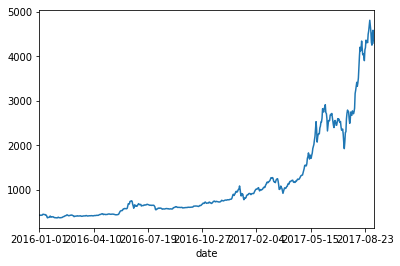

In [21]:
data_.groupby('date')['price'].mean().plot()

In [14]:
# data_ = pd.read_csv(data_dir + 'BITSTAMP_TRADE_SPOTBTC_cum_fix_trial.csv',nrows=1)
data_.dtypes

uuid              object
date              object
day                int64
hour               int64
minute           float64
month            float64
price            float64
second             int64
size             float64
symbol_id         object
taker_side        object
time_coinapi      object
time_day           int64
time_exchange     object
time_hour          int64
time_minute        int64
time_month       float64
time_second      float64
time_year          int64
year               int64
dtype: object

In [30]:
mask_broken = (data['price']  == 'SELL') | (data['price'] == 'BUY')

mask_ok = ~ mask_broken



In [64]:
data.

,uuid,date,day,hour,minute,month,price,second,size,symbol_id,taker_side,time_coinapi,time_day,time_exchange,time_hour,time_minute,time_month,time_second,time_year,year
0,631ab21d-7be4-4748-8a1c-f605634458c7,2017-11-10,10,16,36.0,11.0,6945.36,5,0.066066,BITSTAMP_SPOT_BTC_USD,BUY,2017-11-10T16:36:05.3636363Z,20171110,2017-11-10T16:36:05.0000000Z,2017111016,201711101636,201711,20171110163605,2017,2017


In [48]:
data[mask_ok]['time_exchange'].values[-1]

'2017-11-10T16:36:04.0000000Z'

In [53]:
data_broken = data[mask_broken].copy()

In [99]:
data_broken[[col for col in data_broken.columns if col[-1]=='_']].head(2)

,date_,day_,hour_,minute_,month_,price_,second_,size_,symbol_id_,taker_side_,time_coinapi_,time_day_,time_exchange_,time_hour_,time_minute_,time_year_,year_
6864988,2017-11-21,21,21,41,11.0,8158.91,4,0.000674,BITSTAMP_SPOT_BTC_USD,BUY,2017-11-21T21:41:04.4110299Z,4,2017-11-21T21:41:04.0000000Z,2017112121,201711212141,2017,2017
6864989,2017-11-21,21,21,41,11.0,8158.99,4,0.000797,BITSTAMP_SPOT_BTC_USD,BUY,2017-11-21T21:41:04.6766546Z,4,2017-11-21T21:41:04.0000000Z,2017112121,201711212141,2017,2017


In [103]:
# data_fixed = data[mask_ok].copy()
# data_fixed['price'] = data_fixed['price'].astype(float)
# data_fixed.groupby('date')['size'].sum().plot()
data_fixed[data_fixed['time_coinapi'] == data_fixed['time_coinapi'].max()]

,uuid,date,day,hour,minute,month,price,second,size,symbol_id,taker_side,time_coinapi,time_day,time_exchange,time_hour,time_minute,time_month,time_second,time_year,year
399999,9639a7c8-625d-4fcf-836f-4f2990cf57d7,2017-11-21,21,21,40.0,11.0,8158.97,56,0.000674,BITSTAMP_SPOT_BTC_USD,BUY,2017-11-21T21:40:56.5047753Z,20171121,2017-11-21T21:40:56.0000000Z,2017112121,201711212140,201711,20171121214056,2017,2017


In [60]:
data_broken[:10].tail(2)  

,uuid,date,day,hour,minute,month,price,second,size,symbol_id,taker_side,time_coinapi,time_day,time_exchange,time_hour,time_minute,time_month,time_second,time_year,year
6864996,a452b57e-7eb3-43d3-811b-e6503b2b1eff,BITSTAMP_SPOT_BTC_USD,2017-11-21T21:41:07.0000000Z,2017-11-21T21:41:07.7235388Z,8159.00,0.042081,BUY,2017,11.0,21,21,41,7,2017,201711,20171121,2017112121,201711212141,20171121214107,2017-11-21
6864997,6309e2ba-4c87-4a32-a593-378595f32810,BITSTAMP_SPOT_BTC_USD,2017-11-21T21:41:07.0000000Z,2017-11-21T21:41:07.2352857Z,8158.91,0.002022,BUY,2017,11.0,21,21,41,7,2017,201711,20171121,2017112121,201711212141,20171121214107,2017-11-21


In [ ]:
data_broken[[col for col in data_broken.columns if col[-1]=='_']]

In [104]:

data_broken['date_'] = data_broken['year']
data_broken['day_'] = data_broken['symbol_id']
data_broken['hour_'] = data_broken['taker_side']
data_broken['minute_'] = data_broken['time_coinapi']
data_broken['month_'] = data_broken['size']
data_broken['price_'] = data_broken['minute']
data_broken['second_'] = data_broken['time_day']
data_broken['size_'] = data_broken['month']
data_broken['symbol_id_'] = data_broken['date']
data_broken['taker_side_'] = data_broken['price']
data_broken['time_coinapi_'] = data_broken['hour']
data_broken['time_day_'] = data_broken['time_day']
data_broken['time_exchange_'] = data_broken['day']
data_broken['time_hour_'] = data_broken['time_month']
data_broken['time_minute_'] = data_broken['time_second']
data_broken['time_year_'] = data_broken['second']
data_broken['year_'] = data_broken['time_exchange']


In [105]:
data_broken = data_broken[[col for col in data_broken.columns if col[-1]=='_']]
data_broken.columns = [col[:-1] for col in data_broken.columns if col[-1]=='_']

In [106]:
data_broken.head(1)

,date,day,hour,minute,month,price,second,size,symbol_id,taker_side,time_coinapi,time_day,time_exchange,time_hour,time_minute,time_year,year
6864988,2017-11-21,21,21,41,11.0,8158.91,4,0.000674,BITSTAMP_SPOT_BTC_USD,BUY,2017-11-21T21:41:04.4110299Z,4,2017-11-21T21:41:04.0000000Z,2017112121,201711212141,2017,2017


In [107]:
data_fixed.tail(1)

,uuid,date,day,hour,minute,month,price,second,size,symbol_id,taker_side,time_coinapi,time_day,time_exchange,time_hour,time_minute,time_month,time_second,time_year,year
6864987,b37bfb8d-2a7c-4734-affc-29555f6a64ca,2017-11-10,10,16,36.0,11.0,6945.36,4,2.485,BITSTAMP_SPOT_BTC_USD,BUY,2017-11-10T16:36:05.2278232Z,20171110,2017-11-10T16:36:04.0000000Z,2017111016,201711101636,201711,20171110163604,2017,2017


In [109]:
data_fixed_joined = pd.concat([data_fixed, data_broken])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [118]:
# data_fixed_joined.set_index('uuid', inplace=True)
# data_fixed_joined.sort_values('time_coinapi',inplace=True)
data_fixed_joined.to_csv(data_dir + 'BITSTAMP_TRADE_SPOTBTC_cum_fix_trial.csv')

## Load existing(cumulative) data / Add new / Save all together csv

In [72]:
df_saved = pd.read_csv( data_dir + 'BITSTAMP_TRADE' , index_col='uuid')
df_saved.shape
# df_new.tail(1).to_csv(data_dir + 'BITSTAMP_TRADE_SPOTBTC_last_saved_trade.csv')

(1, 19)

In [73]:
df_saved

,price,size,symbol_id,taker_side,time_coinapi,time_exchange,year,month,day,hour,minute,second,time_year,time_month,time_day,time_hour,time_minute,time_second,date
uuid,,,,,,,,,,,,,,,,,,,
06f5bf72-488a-41e5-8e09-7bd6f695ef73,748.02,0.01,BITSTAMP_SPOT_BTC_USD,SELL,2016-11-19T00:30:35.7033883Z,2016-11-19T00:30:35.0000000Z,2016,11,19,0,30,35,2016,201611,20161119,2016111900,201611190030,20161119003035,2016-11-19


##### TODO ADD DATE MANIPULATION FOR STARTING FROM NEXT DAY

In [125]:
# Manual day addition until above code fixed

first_day_of_new = df_saved['time_exchange'].max()
if first_day_of_new[-9:-1] != '.9999999':
    next_time = str(int(first_day_of_new[-8:-1])+1)
    first_day_of_new = first_day_of_new[:-8]+ "0"*int(len('0000000')-len(next_time)) + next_time + 'Z'
else:
    None
    
last_day_of_new = '2018-01-01'

In [126]:
print(first_day_of_new)
print(last_day_of_new)

2016-11-19T00:30:35.0000001Z
2018-01-01


#### Get JSON data for next day(s)

In [127]:
url = 'https://rest.coinapi.io/v1/trades/BITSTAMP_SPOT_BTC_USD/history?time_start='+ first_day_of_new + '&time_end=' + last_day_of_new + '&limit=100000'

# # url = 'https://rest.coinapi.io/v1/ohlcv/BITSTAMP_SPOT_BTC_USD/history?period_id=1MIN&time_start=2016-01-01T00:00:00'

response = requests.get(url, headers=headers)

if response.content[2:7] != b'error':
    df_new = pd.read_json(response.content).set_index('uuid')
    print(df_new.shape)
else:
    print('Limit yok.')

Limit yok.


### Make integer indexes

In [60]:
df_saved.columns

df_new = make_all_time_indexes(df_new)

cycle year
cycle month
cycle day
cycle hour
cycle minute
cycle second
bin year
bin month
bin day
bin hour
bin minute
bin second


In [128]:
print(df_saved['time_exchange'].unique().max())
print(df_new['time_exchange'].unique().min())
print(df_new['time_exchange'].unique().max())

2016-11-19T00:30:35.0000000Z
2016-11-10T04:14:17.0000000Z
2016-11-19T00:30:35.0000000Z


In [62]:
# from datetime import datetime as dt

# dt.strptime('2016-04-10T22:02:50.73000Z', '%Y-%m-%dT%H:%M:%S.%fZ')

### Indirilen yeni verinin uygunluguna dair bazi checkler

In [63]:
df_new.shape[0] == df_new.index.nunique()

True

In [64]:
all(df_new.isna().mean() == 0)

True

In [65]:
df_both = df_saved.append(df_new)

In [66]:
df_both.shape[0] - df_saved.shape[0] == df_new.shape[0]

True

In [67]:
df_both.head()

,price,size,symbol_id,taker_side,time_coinapi,time_exchange,year,month,day,hour,minute,second,time_year,time_month,time_day,time_hour,time_minute,time_second,date
uuid,,,,,,,,,,,,,,,,,,,
a8daddb5-23f1-46a3-a63a-19304a3e1499,714.55,0.251000,BITSTAMP_SPOT_BTC_USD,BUY,2016-11-10T04:13:48.0711286Z,2016-11-10T04:13:47.0000000Z,2016,11,10,4,13,47,2016,201611,20161110,2016111004,201611100413,20161110041347,2016-11-10
62961fca-4818-427d-bbb8-7077d5d7fe0a,716.19,0.193893,BITSTAMP_SPOT_BTC_USD,BUY,2016-11-10T04:14:17.7898878Z,2016-11-10T04:14:17.0000000Z,2016,11,10,4,14,17,2016,201611,20161110,2016111004,201611100414,20161110041417,2016-11-10
6bc3ce5b-74b4-4651-948c-9a52e38093ea,716.21,0.757561,BITSTAMP_SPOT_BTC_USD,BUY,2016-11-10T04:14:17.9305174Z,2016-11-10T04:14:17.0000000Z,2016,11,10,4,14,17,2016,201611,20161110,2016111004,201611100414,20161110041417,2016-11-10
9a1306e8-4797-481e-bf72-55a8a45419a6,716.22,0.070000,BITSTAMP_SPOT_BTC_USD,BUY,2016-11-10T04:14:37.1805221Z,2016-11-10T04:14:36.0000000Z,2016,11,10,4,14,36,2016,201611,20161110,2016111004,201611100414,20161110041436,2016-11-10
64287d13-4e40-4422-a22a-3dfb31dbfe44,716.22,0.095000,BITSTAMP_SPOT_BTC_USD,BUY,2016-11-10T04:14:51.7117798Z,2016-11-10T04:14:51.0000000Z,2016,11,10,4,14,51,2016,201611,20161110,2016111004,201611100414,20161110041451,2016-11-10


### CSVye eklenenen yeni veriyi diske yaz

In [68]:
with open(data_dir + 'BITSTAMP_TRADE_SPOTBTC_cum.csv','a') as fd:
    df_new.to_csv(fd, header=False)

### Sadece son(zaman olarak) trade verisini ayri olarak kaydet
###### (sonraki sefer kaldigimiz yerden devam ederken, nerede kaldigimizi gormek icin butun veriyi hafizaya yuklemek zorunda kalmayalim diye)

In [70]:
df_new.tail(1).to_csv(data_dir + 'BITSTAMP_TRADE_SPOTBTC_last_saved_trade.csv')

In [206]:
# line = 0
# i = 0

# lines = []
# after = False
# with open(data_dir + 'BITSTAMP_TRADE_SPOTBTC_cum.csv','w') as fd:
#     while line is not None:
#         i = i+1
#         line = fd.readline()
#         print(line)
#         if line is not None:
            
#             if len(line.split(',')) == 39:
#                 after = True
#                 print(i)
#                 print(line.split(','))
#         if after:
#             print(line)
#     #     fd.readlines(999300)

        
# #         line_lens.append(len(fd.readline().split(',')))

In [205]:
# write_lines = []
# vals_line = lines[100].split(',')
# for line in lines:
#     valsinline = line.split(',')
#     if(len(valsinline)==39):
#         vals_line_1 = valsinline[:19]
#         vals_line_2 = valsinline[20:]
#         last_of_line_1 = valsinline[19][:-36]+'\n'
#         first_of_line_2 = valsinline[19][-36:]
# #         print(last_of_line_1, first_of_line_2)
#         vals_line_1.append(last_of_line_1+'\n')
#         vals_line_2.insert(0, first_of_line_2)
        
#         line_1 = ','.join(vals_line_1)
#         line_2 = ','.join(vals_line_2)
        
#         print(line_1)
#         for val in vals_line_1:
#             print(val)
        
#         print(line_2)
#         for val in vals_line_2:
#             print(val)
            
#         print(lines[100])
#         for val in vals_line:
#             print(val)
            
#         write_lines.append(line_1)
#         write_lines.append(line_2)
        
#     else:
#         write_lines.append(line)
        
        
        

In [151]:
print(line_39[0].split(',')[19][-36:], line_39[0].split(',')[19][:-36] )

19f3608c-096e-44e2-ad58-e015f2fc4d88 2016-07-09


In [150]:
# line_39[0].split(',')

In [172]:
with open(data_dir + 'BITSTAMP_TRADE_SPOTBTC_cum.csv','w') as fw:
    fw.writelines(write_lines)
    